In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from .tsv file, had to ignore an error, imported as str for ease and will alter later

ks_data = pd.read_csv('38050-0001-Data.tsv', sep='\t', dtype=str, encoding_errors='ignore')


CLEAN DATA FIRST - MISSING VALUES, LOGIC, DATA TYPES, COLUMN NAMES - SAVE THIS FILE - THIS CAN BE MESSY - RAW DATA W/ CHANGES
FROM FILE ABOVE - EXPLORE THE DATA AND MAKE SOME CHANGES - CONSOLIDATION OF COUNTRIES AND STATUS - EXPORT THIS FILE CLEAN_DATA
FROM FILE ABOVE EXPLORE DATA DISTRIBUTION AND PREPROCESSING
FOR MODELLING - USE THE FILE FROM STEP 2 SAME FOR TABLEAU

# My Functions

In [49]:
#get portion of data
def df_head(dataframe):
    if not dataframe.head().empty:
        return dataframe.head()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#get information
def df_info(dataframe):
    if not dataframe.empty:
        return dataframe.info() 
    else:
        return "There is an issue with your dataframe! Check your dataframe variable."

#get shape
def df_shape(dataframe):
    if dataframe.shape == (0,0):
        return "Your dataframe does not exist! Check your dataframe variable."
    else:
        return dataframe.shape

#decribe dataframe
def describe_df(dataframe, categorical=False):
    if not dataframe.empty:
        if categorical == False:
            return dataframe.describe()
        else:
            return dataframe.describe(include='O')
    else:
        return "Your dataframe does not exist! Check your dataframe variable."


#get columns
def get_columns(dataframe):
    list_length = len(dataframe.columns)
    if list_length >= 0:
        return dataframe.columns
    else:
        return "There are no columns in your dataframe! Check your dataframe variable."

#get column data
def column_data(dataframe, column_name: str):
    if column_name in get_columns(dataframe):
        return dataframe[column_name]
    else:
        return "Your dataframe or column does not exist! Check your dataframe variable and columns."

#check nulls
def check_nulls(dataframe):
    num_nulls = dataframe.isnull().sum()
    percent_nulls = (num_nulls / len(dataframe) * 100).round(2)
    if not dataframe.empty:
        if num_nulls.sum() > 0:
            print(f"Here are the number of nulls per column: \n{num_nulls}")
            print(f"Here are the percent of nulls per column: \n{percent_nulls}")
        else:
            return "There are no nulls in your data."
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#check value counts
def unique(dataframe):
    if not dataframe.empty:
        return f"Here are the number of unique values per columns:", dataframe.nunique()


#check for dups
def check_dups(dataframe):
    num_dups = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {num_dups} duplicates in your dataframe"
    else:
        return "Your dataframe does not exist! Check your dataframe variable."
    
#drop dups
def drop_dups(dataframe):
    dups = check_dups(dataframe)
    if dups == 0:
        return dataframe
    else:
        return dataframe.drop_duplicates()


#Visuals 

def make_hist(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].hist(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make boxplots
def make_boxplot(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].boxplot(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make pairplot
def make_pairplot(dataframe):
    return sns.pairplot(dataframe)

#make heatmap
def make_heatmap(dataframe):
    correlation = dataframe.corr(numeric_only=True)
    sns.heatmap(correlation, cmap='coolwarm', annot=True)
    return plt.show()

#make scatter plot
def make_scatter(dataframe, x_column, y_column, title: str, x_label: str, y_label: str):
    plt.scatter(x=dataframe[x_column], y=dataframe[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

# Data Formatting

In [14]:
#make copy of raw data
ks_copy = ks_data.copy()

In [7]:
#first thing I want to do is check for duplicates
check_dups(ks_copy)

'There are 0 duplicates in your dataframe'

In [33]:
#See how data is formatted and what cleaning needs to be done
ks_copy.sample(10)

,CASEID,NAME,PID,CATEGORY,CATEGORY_ID,SUBCATEGORY,SUBCATEGORY_ID,PROJECT_PAGE_LOCATION_NAME,PROJECT_PAGE_LOCATION_STATE,PROJECT_PAGE_LOCATION_COUNTY,...,LAUNCHED_DATE,DEADLINE_DATE,PROJECT_CURRENCY,GOAL_IN_ORIGINAL_CURRENCY,PLEDGED_IN_ORIGINAL_CURRENCY,GOAL_IN_USD,PLEDGED_IN_USD,BACKERS_COUNT,STATE,URL_NAME
232503,232504,MASKED BY ICPSR,565375716,Games,12,Tabletop Games,34,Washington,DC,District of Columbia,...,10/20/2017,11/20/2017,USD,"6,500",249,"$6,500",$249,6,failed,MASKED BY ICPSR
282141,282142,MASKED BY ICPSR,636265752,Publishing,18,Nonfiction,48,Victorville,CA,San Bernardino,...,7/8/2020,8/7/2020,USD,"5,000","1,041","$5,000","$1,041",10,failed,MASKED BY ICPSR
378859,378860,MASKED BY ICPSR,198700944,Publishing,18,Art Books,45,Shaker Heights,OH,Cuyahoga,...,10/9/2013,11/9/2013,USD,"2,000","2,126","$2,000","$2,126",34,successful,MASKED BY ICPSR
313790,313791,MASKED BY ICPSR,419784887,Publishing,18,Poetry,50,Queens,NY,,...,3/8/2013,4/7/2013,USD,"3,500",422,"$3,500",$422,8,failed,MASKED BY ICPSR
169988,169989,MASKED BY ICPSR,983316237,Publishing,18,Fiction,47,Chicago,IL,Cook,...,6/26/2012,7/24/2012,USD,"10,000",0,"$10,000",$0,0,canceled,MASKED BY ICPSR
460519,460520,MASKED BY ICPSR,692771847,Games,12,Tabletop Games,34,Melbourne,VIC,,...,2/2/2020,2/16/2020,AUD,500,608,$336,$408,39,successful,MASKED BY ICPSR
383089,383090,MASKED BY ICPSR,302784945,Theater,17,Theater,17,London,England,Greater London,...,10/22/2015,11/18/2015,GBP,"2,000","2,548","$3,036","$3,868",64,successful,MASKED BY ICPSR
455953,455954,MASKED BY ICPSR,988248430,Art,1,Art,1,Kingston,ON,Frontenac,...,12/9/2014,1/8/2015,CAD,550,17,$465,$14,2,failed,MASKED BY ICPSR
264572,264573,MASKED BY ICPSR,1546102536,Music,14,Hip-Hop,39,Chicago,IL,Cook,...,11/6/2011,1/5/2012,USD,"5,000","5,113","$5,000","$5,113",26,successful,MASKED BY ICPSR
421784,421785,MASKED BY ICPSR,224029306,Food,10,Cookbooks,306,Winslow,AZ,Navajo,...,5/14/2018,5/25/2018,USD,"1,000","1,356","$1,000","$1,356",44,successful,MASKED BY ICPSR


I can drop Name and URL_Name as they are masked by my data source

In [15]:
#I will remove some columns like Name amd URL as the data is masked and some ID columns as the data is redundant

ks_copy = ks_copy.drop(['NAME','URL_NAME'], axis=1)

In [16]:
#let's format and rename the columns so it doesnt look like we are yelling

ks_copy.columns = ks_copy.columns.str.capitalize()

# Some of the column names are too long
new_features = {'Caseid': 'Case_ID', 'Project_page_location_name': 'Project_Country',
                 'Project_page_location_state': 'Project_State', 'Project_page_location_county': 'City',
                 'Launched_date': 'Launched', 'Deadline_date': 'Deadline',
                 'Project_currency': 'Project_Currency', 'Goal_in_original_currency': 'Goal',
                 'Pledged_in_original_currency': 'Pledged', 'Goal_in_usd': 'Goal (USD)',
                 'Pledged_in_usd': 'Pledged (USD)', 'Backers_count': 'Backers (#)',
                 'State': 'Status'}

#change column names
ks_copy.rename(columns=new_features, inplace=True)

In [10]:
ks_copy.sample(10)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Project_State,City,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
472691,472692,1272627229,Design,7,Product Design,28,Perth,WA,,1099293269,6/9/2015,7/9/2015,AUD,500,0,$373,$0,0,failed
127074,127075,282994137,Food,10,Small Batch,313,Providence,RI,Providence,848839972,8/9/2017,9/3/2017,USD,"16,000",179,"$16,000",$179,4,failed
386733,386734,1548624168,Music,14,Jazz,41,London,England,Greater London,1637441397,5/4/2015,6/3/2015,GBP,"1,800","2,080","$2,763","$3,193",72,successful
103452,103453,371275344,Crafts,26,Crafts,26,Vancouver,BC,Greater Vancouver,1415005697,11/14/2014,12/14/2014,CAD,"20,000",70,"$17,631",$62,2,suspended
195150,195151,2045732639,Fashion,9,Apparel,263,Ann Arbor,MI,Washtenaw,21321312,9/17/2020,11/1/2020,USD,"10,000",908,"$10,000",$908,21,failed
502845,502846,1291259864,Food,10,Food,10,Troy,TN,Obion,1796045847,7/12/2014,8/6/2014,USD,40,0,$40,$0,0,failed
191134,191135,1839270195,Games,12,Tabletop Games,34,Fort Myers,FL,Lee,1628183457,2/25/2020,3/29/2020,USD,"10,000","13,576","$10,000","$13,576",285,successful
421399,421400,307892252,Art,1,Public Art,53,Seattle,WA,King,1383111647,11/22/2011,12/19/2011,USD,"1,000","1,022","$1,000","$1,022",36,successful
154728,154729,1110079624,Fashion,9,Accessories,262,West Midlands,England,,573839284,1/27/2015,2/26/2015,GBP,"12,000",22,"$18,529",$34,1,canceled
89340,89341,1049236694,Games,12,Tabletop Games,34,Turin,Piedmont,Turin,1059671560,1/15/2019,2/13/2019,EUR,"25,000","33,032","$28,342","$37,448",622,successful


In [17]:
#check for empty strings first given its a tsv
empty_strings = ks_copy.applymap(lambda x: x == ' ')
count_empty = empty_strings.sum()
print(count_empty)

Case_ID                 0
Pid                     0
Category                0
Category_id             0
Subcategory             0
Subcategory_id          0
Project_Country      1873
Project_State        2014
City                64082
Uid                     0
Launched                0
Deadline                0
Project_Currency        0
Goal                    0
Pledged                 0
Goal (USD)              0
Pledged (USD)           0
Backers (#)         10148
Status                  0
dtype: int64


I have empty strings in 4 columns and will have to deal with these later

First I want to deal with Goal and Pledged and remove certain characters

In [11]:
# format the numerical columns - Goal, Pledged, Goal (USD), Pledged (USD), Backers (#)

numeric_columns = ['Goal', 'Pledged', 'Goal (USD)', 'Pledged (USD)', 'Backers (#)']


#replace characters
def replace_characters(dataframe, columns, characters, replacement, regex):
    for column in columns:
        dataframe[column].replace(characters, replacement, regex=regex, inplace=True)
    return dataframe


#change data types
def change_data_type(dataframe, columns, new_type):
   for column in columns:
       dataframe[column] = dataframe[column].astype(new_type)
   return df_info(dataframe)


In [18]:
#replace some regula expressions in numeric columns with empty string
replace_characters(ks_copy, numeric_columns, '\$|,|\\s', '', True)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Project_State,City,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,1,2137925650,Film & Video,11,Science Fiction,301,London,England,Greater London,1076478145,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,2,1501531085,Film & Video,11,Fantasy,296,Los Angeles,CA,Los Angeles,224946798,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,3,953415668,Technology,16,Software,51,Mexico,Baja California,Tijuana,1772203542,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,4,1371386304,Publishing,18,Publishing,18,Columbus,OH,Franklin,1373465389,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,5,1720842777,Art,1,Illustration,22,Toronto,ON,Toronto,1455666383,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506194,506195,932773640,Publishing,18,Children's Books,46,Palo Alto,CA,Santa Clara,1484349690,8/7/2014,9/6/2014,USD,1,0,1,0,0,failed
506195,506196,620302213,Art,1,Conceptual Art,20,Detroit,MI,Wayne,211945026,11/25/2009,12/4/2009,USD,0,100,0,100,6,successful
506196,506197,688564643,Publishing,18,Fiction,47,Lyme,NH,Grafton,388384107,11/7/2011,12/13/2011,USD,0,0,0,0,0,canceled
506197,506198,9572984,Film & Video,11,Shorts,32,New York,NY,,1600537964,1/25/2012,3/16/2012,USD,0,0,0,0,0,failed


In [19]:
#replace '' in numeric columns with np.nan
replace_characters(ks_copy, numeric_columns, '', np.nan, True)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Project_State,City,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,1,2137925650,Film & Video,11,Science Fiction,301,London,England,Greater London,1076478145,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,2,1501531085,Film & Video,11,Fantasy,296,Los Angeles,CA,Los Angeles,224946798,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,3,953415668,Technology,16,Software,51,Mexico,Baja California,Tijuana,1772203542,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,4,1371386304,Publishing,18,Publishing,18,Columbus,OH,Franklin,1373465389,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,5,1720842777,Art,1,Illustration,22,Toronto,ON,Toronto,1455666383,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506194,506195,932773640,Publishing,18,Children's Books,46,Palo Alto,CA,Santa Clara,1484349690,8/7/2014,9/6/2014,USD,1,0,1,0,0,failed
506195,506196,620302213,Art,1,Conceptual Art,20,Detroit,MI,Wayne,211945026,11/25/2009,12/4/2009,USD,0,100,0,100,6,successful
506196,506197,688564643,Publishing,18,Fiction,47,Lyme,NH,Grafton,388384107,11/7/2011,12/13/2011,USD,0,0,0,0,0,canceled
506197,506198,9572984,Film & Video,11,Shorts,32,New York,NY,,1600537964,1/25/2012,3/16/2012,USD,0,0,0,0,0,failed


In [20]:
#replace all values where empty string with np.NaN
replace_characters(ks_copy, ks_copy.columns, ' ', np.nan, False)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Project_State,City,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,1,2137925650,Film & Video,11,Science Fiction,301,London,England,Greater London,1076478145,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,2,1501531085,Film & Video,11,Fantasy,296,Los Angeles,CA,Los Angeles,224946798,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,3,953415668,Technology,16,Software,51,Mexico,Baja California,Tijuana,1772203542,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,4,1371386304,Publishing,18,Publishing,18,Columbus,OH,Franklin,1373465389,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,5,1720842777,Art,1,Illustration,22,Toronto,ON,Toronto,1455666383,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506194,506195,932773640,Publishing,18,Children's Books,46,Palo Alto,CA,Santa Clara,1484349690,8/7/2014,9/6/2014,USD,1,0,1,0,0,failed
506195,506196,620302213,Art,1,Conceptual Art,20,Detroit,MI,Wayne,211945026,11/25/2009,12/4/2009,USD,0,100,0,100,6,successful
506196,506197,688564643,Publishing,18,Fiction,47,Lyme,NH,Grafton,388384107,11/7/2011,12/13/2011,USD,0,0,0,0,0,canceled
506197,506198,9572984,Film & Video,11,Shorts,32,New York,NY,NaN,1600537964,1/25/2012,3/16/2012,USD,0,0,0,0,0,failed


In [21]:
#change Status values to title case

ks_copy['Status'] = ks_copy['Status'].str.title()

In [22]:
ks_copy.sample(10)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Project_State,City,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
430899,430900,508642052,Film & Video,11,Shorts,32,Greater Manchester,England,NaN,838370274,4/7/2014,5/7/2014,GBP,1000,1040,1697,1766,22,Successful
334792,334793,976522141,Publishing,18,Nonfiction,48,London,England,Greater London,998831031,4/15/2019,5/25/2019,GBP,3000,19,3814,24,4,Failed
68689,68690,42459885,Music,14,Music,14,Hamburg,Hamburg,Stadtkreis Hamburg,1708820842,3/19/2018,4/15/2018,EUR,34000,14450,41955,17831,128,Failed
443897,443898,1933436632,Crafts,26,Crafts,26,St. Louis,MO,St. Louis City,1864757111,4/5/2015,4/28/2015,USD,750,1,750,1,1,Failed
315756,315757,543713677,Crafts,26,Crafts,26,Phoenix,AZ,Maricopa,483372177,10/28/2014,12/27/2014,USD,3500,1,3500,1,1,Failed
71594,71595,1828540537,Film & Video,11,Fantasy,296,Milano,Lombardy,Bergamo,368080000,6/11/2020,7/31/2020,EUR,30000,2731,35675,3248,22,Failed
122829,122830,1951630706,Art,1,Painting,23,Akron,OH,Summit,1420142021,8/11/2014,9/10/2014,USD,18000,251,18000,251,8,Failed
79183,79184,141007413,Publishing,18,Art Books,45,Los Angeles,CA,Los Angeles,1991633268,1/27/2015,2/26/2015,USD,30000,1076,30000,1076,14,Failed
311878,311879,609652723,Film & Video,11,Webseries,33,Los Angeles,CA,Los Angeles,2050453284,2/15/2011,3/17/2011,USD,3500,0,3500,0,0,Failed
9475,9476,363450373,Technology,16,Technology,16,Dallas,TX,Dallas,815451660,9/26/2012,11/10/2012,USD,250000,3201,250000,3201,56,Failed


In [24]:
#check nulls now that they were added above
check_nulls(ks_copy)

Here are the number of nulls per column: 
Case_ID                 0
Pid                     0
Category                0
Category_id             0
Subcategory             0
Subcategory_id          0
Project_Country      1873
Project_State        2014
City                64082
Uid                     0
Launched                0
Deadline                0
Project_Currency        0
Goal                    0
Pledged                 0
Goal (USD)              0
Pledged (USD)           0
Backers (#)         10148
Status                  0
dtype: int64
Here are the percent of nulls per column: 
Case_ID              0.00
Pid                  0.00
Category             0.00
Category_id          0.00
Subcategory          0.00
Subcategory_id       0.00
Project_Country      0.37
Project_State        0.40
City                12.66
Uid                  0.00
Launched             0.00
Deadline             0.00
Project_Currency     0.00
Goal                 0.00
Pledged              0.00
Goal (USD)        

Nulls are present in Country, State, City, Backers. City has a null frequency of 12.66, but the others are 2% and lower. Will decide how to proceed later.

In [15]:
#see unique values per feature
unique(ks_copy)
#There are not over 21k countries...

('Here are the number of unique values per columns:',
 Category               15
 Subcategory           161
 Project_Country     21201
 Project_State        1550
 City                 5412
 Launched             4256
 Deadline             4208
 Project_Currency       15
 Goal                10725
 Pledged             52112
 Goal (USD)          41992
 Pledged (USD)       49686
 Backers (#)          1001
 Status                  4
 dtype: int64)

Will do a breakdown of Category, Status and Country.

There are apparantly over 21k unique values for countries which is False. The Project_State and city are also a complete mess and will take too much time to clean. So, I will drop them. I will also drop the Goal and Pledged for USD as they are redundant. 

From the [Kickstarter website](https://help.kickstarter.com/hc/en-us/articles/115005127954-Can-I-choose-my-project-s-display-currency-#:~:text=Kickstarter%20does%20offer%20backers%20the%20option%20to%20set,currency%2C%20not%20in%20a%20backer%E2%80%99s%20preferred%20display%20currency.), the following is given
 > "It’s not possible to choose a preferred display currency for your project. By default, the currency your project will display and collect funds in is determined by the country of origin* you indicate when building your project. For example, if your banking and identity information are based in, say, Hong Kong, your project goal and reward costs will automatically be displayed in HKD. Once your project ends, the funds collected will be sent to you in HKD. If you’re in the UK, they’ll be in GBP, and so on. Kickstarter does offer backers the option to set a preferred display currency when browsing projects. However, pledges will always be collected in the project’s native currency, not in a backer’s preferred display currency. *For projects launching from Denmark, Norway, Sweden, Switzerland, and Poland, creators now have the option to choose whether to run their project in their country’s native currency, or in Euros.*"

So, I will use the currency codes to replace the Project_country, and drop the State, and city. There are no nulls in Project_currency so I will use those to map the missing values in countries


In [25]:
#make dictionary using project currency

currency_codes = {'USD': 'United States of America', 'EUR': 'European Union', 'GBP': 'United Kingdom', 'CAD': 'Canada', 
                  'AUD': 'Australia', 'MXN': 'Mexico', 'SEK': 'Sweden', 'HKD': 'Hong Kong',
                  'NZD': 'New Zealand', 'DKK': 'Denmark', 'SGD': 'Singapore', 'CHF': 'Switzerland',
                  'NOK': 'Norway', 'JPY': 'Japan', 'PLN': 'Poland'}

#replace Project_Country values with currency code dictionary
ks_copy['Project_Country'] = ks_copy['Project_Currency'].map(currency_codes)

#Drop project_state, city, Goal and pledged (USD) - these are redundant features
ks_copy.drop(['Project_State', 'City', 'Goal (USD)', 'Pledged (USD)'], axis=1, inplace=True)

In [26]:
#view data to see format
ks_copy.sample(10)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status
124036,124037,2128283202,Games,12,Tabletop Games,34,United States of America,683340922,4/13/2015,5/15/2015,USD,17000,6655,169,Canceled
317831,317832,2142387922,Music,14,Classical Music,36,United States of America,2038017997,1/12/2015,2/11/2015,USD,3500,3580,50,Successful
470801,470802,516495866,Art,1,Public Art,53,United States of America,1899831662,11/9/2013,12/2/2013,USD,500,531,15,Successful
226277,226278,1642653771,Music,14,Hip-Hop,39,United States of America,285059162,9/7/2010,12/4/2010,USD,7000,25,1,Failed
141497,141498,1803150194,Photography,15,Photobooks,280,United States of America,1599329668,8/7/2015,9/5/2015,USD,15000,25,1,Failed
483357,483358,114046036,Art,1,Performance Art,24,United States of America,699876364,10/12/2012,11/11/2012,USD,300,10,1,Canceled
318675,318676,261120168,Fashion,9,Fashion,9,European Union,1732554939,1/17/2017,2/24/2017,EUR,3500,4696,85,Successful
307148,307149,2079198977,Art,1,Illustration,22,United States of America,1994403677,1/5/2015,2/4/2015,USD,4000,26,2,Failed
226429,226430,1230978820,Design,7,Product Design,28,United States of America,731349893,6/4/2019,7/4/2019,USD,7000,7406,91,Successful
187487,187488,940723177,Technology,16,Apps,332,United States of America,2045333476,4/29/2016,5/29/2016,USD,10000,0,0,Failed


In [27]:
#view data types and see what needs to change
df_info(ks_copy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Case_ID           506199 non-null  object
 1   Pid               506199 non-null  object
 2   Category          506199 non-null  object
 3   Category_id       506199 non-null  object
 4   Subcategory       506199 non-null  object
 5   Subcategory_id    506199 non-null  object
 6   Project_Country   506199 non-null  object
 7   Uid               506199 non-null  object
 8   Launched          506199 non-null  object
 9   Deadline          506199 non-null  object
 10  Project_Currency  506199 non-null  object
 11  Goal              506199 non-null  object
 12  Pledged           506199 non-null  object
 13  Backers (#)       496051 non-null  object
 14  Status            506199 non-null  object
dtypes: object(15)
memory usage: 57.9+ MB


I need to change Launched and Deadline to DateTimee

Goal, Pledged, Backers (#) should become ints

Still need to deal with nulls in Backers (#)

In [28]:
#change Launched and Deadline to datetime

ks_copy['Launched'] = pd.to_datetime(ks_copy['Launched'])
ks_copy['Deadline'] = pd.to_datetime(ks_copy['Deadline'])

In [29]:
#some more data cleaning

#fill nan with 0 in Backers (#)
ks_copy['Backers (#)'].fillna(0, inplace=True)

#change data type of Goal, Pledged, Backers (#) to int
change_data_type(ks_copy, ['Goal', 'Pledged', 'Backers (#)'], int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Case_ID           506199 non-null  object        
 1   Pid               506199 non-null  object        
 2   Category          506199 non-null  object        
 3   Category_id       506199 non-null  object        
 4   Subcategory       506199 non-null  object        
 5   Subcategory_id    506199 non-null  object        
 6   Project_Country   506199 non-null  object        
 7   Uid               506199 non-null  object        
 8   Launched          506199 non-null  datetime64[ns]
 9   Deadline          506199 non-null  datetime64[ns]
 10  Project_Currency  506199 non-null  object        
 11  Goal              506199 non-null  int64         
 12  Pledged           506199 non-null  int64         
 13  Backers (#)       506199 non-null  int64         
 14  Stat

I have made the necessary data type conversions and dealt with nulls...but not fully

Next, I want to see if any of the numeric columns are under 0 and change those to 0

In [30]:
#check if any of the numeric columns have values under 0

under_0 =  ks_copy[(ks_copy['Goal'] < 0) | (ks_copy['Pledged'] < 0) | (ks_copy['Backers (#)'] < 0)]

under_0


,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status
14428,14429,1317300700,Design,7,Product Design,28,United States of America,924758631,2014-11-19,2015-01-01,USD,150000,0,-2,Failed
117146,117147,1474098850,Design,7,Product Design,28,United States of America,1521927591,2014-12-09,2015-01-13,USD,20000,0,-2,Failed


In [31]:
#replace negative in Backers(#) - they were classified as Failed, so 0 makes sense.
ks_copy.loc[under_0.index, 'Backers (#)'] = 0

In [32]:
ks_copy[(ks_copy['Goal'] < 0) | (ks_copy['Pledged'] < 0) | (ks_copy['Backers (#)'] < 0)]

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status


In [35]:
#check for successful campaigns that have 0 backers - 9890 instances will replace these with medians
success_no_backers = (ks_copy['Backers (#)'] == 0) & (ks_copy['Status'] == 'Successful')
success_no_backers.sum()

9890

In [36]:
#get median values for successful campaigns
median_backers_success = ks_copy.loc[(ks_copy['Status'] == 'Successful') & (ks_copy['Backers (#)'] != 0), 'Backers (#)'].median()

# Replace the values that are 0 with the median value
ks_copy.loc[success_no_backers, 'Backers (#)'] = median_backers_success

In [37]:
#check to see if above worked - 
ks_copy[(ks_copy['Backers (#)'] == 0) & (ks_copy['Status'] == 'Successful')]

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status


In [40]:
#check for Successful status where Pledged < Goal - These should be Failures 6 instances
should_be_fails = ks_copy[(ks_copy['Status'] == 'Successful') & (ks_copy['Pledged'] < ks_copy['Goal'])]
should_be_fails

#you could argue some of these are successful, but for consistency, Successful is when the amount Pledged >= Goal.

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status
63410,63411,1769772834,Film & Video,11,Shorts,32,United States of America,467587104,2015-11-12,2015-12-27,USD,36000,30716,275,Successful
96929,96930,780863434,Design,7,Product Design,28,European Union,1859408531,2016-02-08,2016-03-19,EUR,25000,24892,90,Successful
213768,213769,251325270,Film & Video,11,Documentary,30,United States of America,743480254,2010-06-02,2010-07-18,USD,8000,7999,73,Successful
310230,310231,1368992939,Art,1,Art,1,United States of America,1950923834,2012-07-26,2012-08-27,USD,3600,3599,64,Successful
382225,382226,4732285,Art,1,Art,1,United States of America,1602482991,2010-05-26,2010-07-08,USD,2000,1999,30,Successful
506024,506025,715247891,Comics,3,Comics,3,European Union,343048188,2020-03-12,2020-03-13,EUR,1,0,70,Successful


In [41]:
# Replace the values that match the condition with 'Failed'
ks_copy.loc[ks_copy['Pledged'] < ks_copy['Goal'], 'Status'] = 'Failed'

In [42]:
#check above
ks_copy[(ks_copy['Status'] == 'Successful') & (ks_copy['Pledged'] < ks_copy['Goal'])]

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status


In [43]:
#check for Failed Campaigns where pledged > Goal - These should be successful - 2065 instances
should_be_success = (ks_copy['Status'] == 'Failed') & (ks_copy['Pledged'] > ks_copy['Goal'])

should_be_success.sum()

14

In [44]:
#replace above values 
ks_copy.loc[should_be_success, 'Status'] = 'Successful'

In [45]:
#check above
ks_copy[(ks_copy['Status'] == 'Failed') & (ks_copy['Pledged'] > ks_copy['Goal'])]

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status


In [46]:
ks_copy.sample(10)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status
431634,431635,1367321893,Technology,16,Web,342,Australia,279450022,2015-02-02,2015-03-04,AUD,1000,6,2,Failed
28712,28713,1558897808,Technology,16,Gadgets,337,United States of America,1139883873,2017-01-05,2017-03-02,USD,80000,85044,761,Successful
386973,386974,814182916,Music,14,World Music,44,United States of America,946317319,2015-05-11,2015-06-10,USD,1800,2055,35,Successful
489243,489244,1747308284,Theater,17,Musical,284,United Kingdom,300973952,2017-08-01,2017-08-11,GBP,250,280,10,Successful
11467,11468,1377887893,Music,14,Rock,43,United States of America,751151421,2017-08-02,2017-10-01,USD,200000,0,0,Failed
228297,228298,1999266610,Publishing,18,Fiction,47,United States of America,454359156,2012-09-30,2012-11-29,USD,7000,8172,74,Successful
490797,490798,1138810710,Crafts,26,Woodworking,356,United States of America,580916190,2016-05-02,2016-05-17,USD,200,617,6,Successful
348211,348212,1732588890,Publishing,18,Children's Books,46,Canada,2144712490,2017-02-04,2017-02-28,CAD,2500,2550,23,Successful
117825,117826,1215187624,Games,12,Tabletop Games,34,United States of America,1335519475,2012-11-16,2012-12-07,USD,20000,775,16,Failed
457589,457590,283174946,Games,12,Video Games,35,United States of America,1853531226,2019-02-14,2019-03-16,USD,500,161,6,Failed


Data is formatted now and can be saved to a file. This file and variations of it will be used going forward.

In [47]:
#save to file for further work
ks_copy.to_csv('raw_clean_data.csv', index=False)

# Exploratory Data Analysis

In [61]:
#import raw_clean data
data = pd.read_csv('raw_clean_data.csv')

In [5]:
df_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Case_ID           506199 non-null  int64 
 1   Pid               506199 non-null  int64 
 2   Category          506199 non-null  object
 3   Category_id       506199 non-null  int64 
 4   Subcategory       506199 non-null  object
 5   Subcategory_id    506199 non-null  int64 
 6   Project_Country   506199 non-null  object
 7   Uid               506199 non-null  int64 
 8   Launched          506199 non-null  object
 9   Deadline          506199 non-null  object
 10  Project_Currency  506199 non-null  object
 11  Goal              506199 non-null  int64 
 12  Pledged           506199 non-null  int64 
 13  Backers (#)       506199 non-null  int64 
 14  Status            506199 non-null  object
dtypes: int64(8), object(7)
memory usage: 57.9+ MB


In [6]:
check_dups(data)

'There are 0 duplicates in your dataframe'

In [7]:
check_nulls(data)

'There are no nulls in your data.'

- 14 features with ~507k instances.
- Not all columns are relevant (eg. ID columns)
- Launched and Deadline need to become datetime
- no nulls and no duplicates

In [62]:
# declare relevant columns - ommisions due to redundancy and irrelevent
numeric_columns = ['Goal', 'Pledged', 'Backers (#)']
cat_columns = ['Category', 'Subcategory', 'Project_Country', 'Status']

#describe numeric columns
describe_df(data[numeric_columns])

,Goal,Pledged,Backers (#)
count,5.061990e+05,5.061990e+05,506199.000000
mean,5.084539e+04,1.687472e+04,60.305621
std,1.171582e+06,8.334953e+05,121.627346
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,4.800000e+01,2.000000
50%,5.000000e+03,7.650000e+02,15.000000
75%,1.600000e+04,4.733000e+03,64.000000
max,1.000000e+08,4.816218e+08,999.000000


In [63]:
#decribe categorical columns
describe_df(data[cat_columns], categorical=True)

,Category,Subcategory,Project_Country,Status
count,506199,506199,506199,506199
unique,15,161,15,4
top,Film & Video,Product Design,United States of America,Failed
freq,75808,33193,370515,309599


Let's do some feature engineering

In [64]:
# Convert Deadline and Launched to datetime
data['Deadline'] = pd.to_datetime(data['Deadline'])
data['Launched'] = pd.to_datetime(data['Launched'])

#calculate the duration of campaign in days
data['Duration (days)'] = (data['Deadline'] - data['Launched']).dt.days

#add columns for Year and Month

data['Year'] = data['Launched'].dt.year
data['Month'] = data['Launched'].dt.month_name()

In [16]:
df_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Case_ID           506199 non-null  int64         
 1   Pid               506199 non-null  int64         
 2   Category          506199 non-null  object        
 3   Category_id       506199 non-null  int64         
 4   Subcategory       506199 non-null  object        
 5   Subcategory_id    506199 non-null  int64         
 6   Project_Country   506199 non-null  object        
 7   Uid               506199 non-null  int64         
 8   Launched          506199 non-null  datetime64[ns]
 9   Deadline          506199 non-null  datetime64[ns]
 10  Project_Currency  506199 non-null  object        
 11  Goal              506199 non-null  int64         
 12  Pledged           506199 non-null  int64         
 13  Backers (#)       506199 non-null  int64         
 14  Stat

In [17]:
#redefine numeric and categorical columns
numeric_columns = ['Goal', 'Pledged', 'Backers (#)', 'Duration (days)', 'Year']
cat_columns = ['Category', 'Subcategory', 'Project_Country', 'Status', 'Month']

#redo description
describe_df(data[numeric_columns])

,Goal,Pledged,Backers (#),Duration (days),Year
count,5.061990e+05,5.061990e+05,506199.000000,506199.000000,506199.000000
mean,5.084539e+04,1.687472e+04,60.305621,34.082963,2015.360131
std,1.171582e+06,8.334953e+05,121.627346,12.857864,2.648268
min,0.000000e+00,0.000000e+00,0.000000,0.000000,2009.000000
25%,2.000000e+03,4.800000e+01,2.000000,30.000000,2013.000000
50%,5.000000e+03,7.650000e+02,15.000000,30.000000,2015.000000
75%,1.600000e+04,4.733000e+03,64.000000,37.000000,2017.000000
max,1.000000e+08,4.816218e+08,999.000000,98.000000,2020.000000


In [18]:
#describe cat columns
describe_df(data[cat_columns], categorical=True)

,Category,Subcategory,Project_Country,Status,Month
count,506199,506199,506199,506199,506199
unique,15,161,15,4,12
top,Film & Video,Product Design,United States of America,Failed,July
freq,75808,33193,370515,309599,47490


In [19]:
#get count data
def get_counts(dataframe, column):
    new_df = pd.DataFrame(dataframe[column].value_counts())
    new_df.reset_index(inplace=True)
    new_df.rename(columns={'index': column, column: 'Count'}, inplace=True)
    return new_df

# function to graph counts
def graph_counts(dataframe, x_column, y_column, figsize=tuple):
    plt.figure(figsize=figsize)
    plt.bar(dataframe[x_column], dataframe[y_column])
    plt.xticks(rotation=45)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{x_column} {y_column}")
    plt.show()

In [20]:
#count of campaigns by category
category_counts = get_counts(data, 'Category')

#count of campaigns by Country
country_count = get_counts(data, 'Project_Country')

#count of campaigns by Status
status_count = get_counts(data, 'Status')

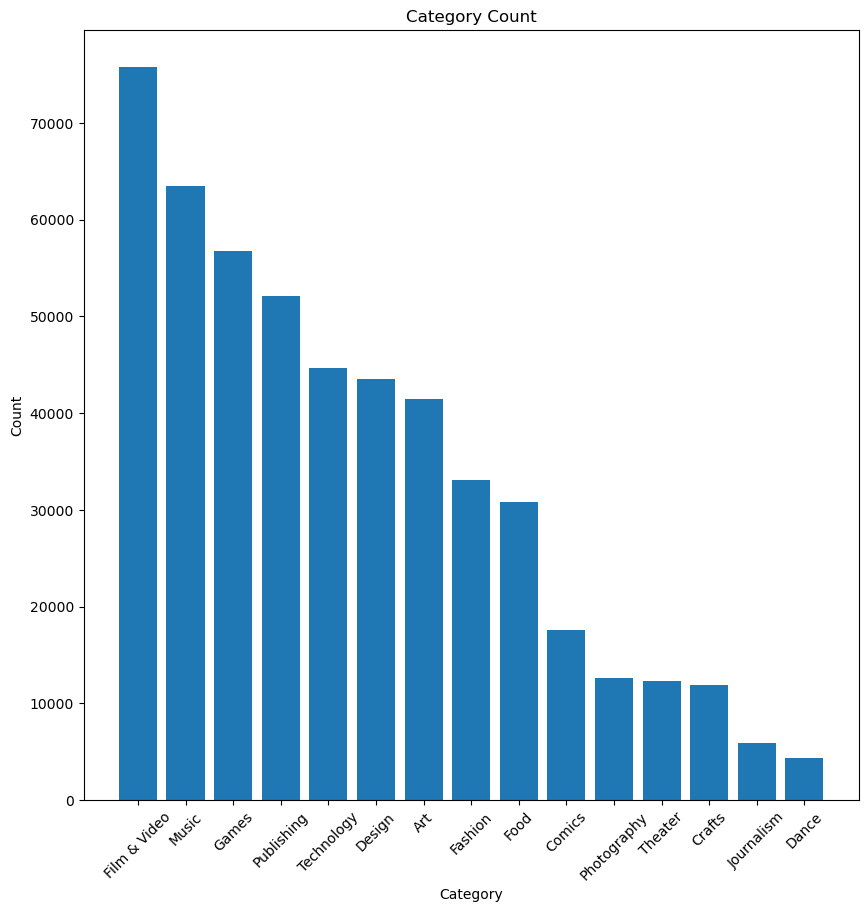

In [21]:
#graph campaign counts by category
graph_counts(category_counts, 'Category', 'Count', figsize=(10, 10))

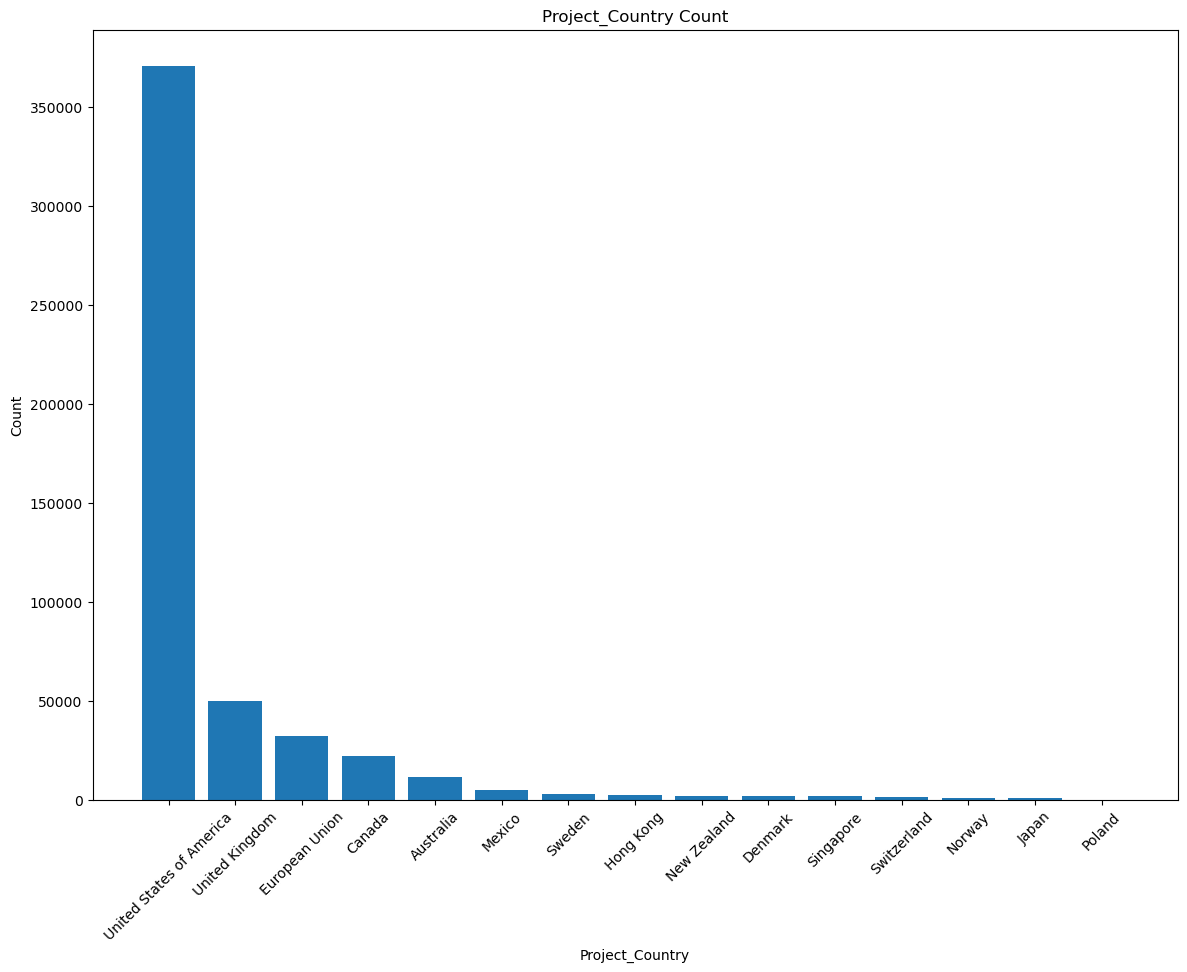

In [22]:
#graph campaign count by country
graph_counts(country_count, 'Project_Country', 'Count',  figsize=(14, 10))

In [23]:
#percent of data that country contributes
(data['Project_Country'].value_counts() / len(data) * 100).round()

United States of America    73.0
United Kingdom              10.0
European Union               6.0
Canada                       4.0
Australia                    2.0
Mexico                       1.0
Sweden                       1.0
Hong Kong                    1.0
New Zealand                  0.0
Denmark                      0.0
Singapore                    0.0
Switzerland                  0.0
Norway                       0.0
Japan                        0.0
Poland                       0.0
Name: Project_Country, dtype: float64

The US UK, Europe, Canada, and Australia account for the majority of instances in the dataset.

I will add Sweden, Denmark, Switzerland, Norway, and Poland to the European Union count. I will also change the currency for these countries to Euro.

From the [Kickstarter website](https://help.kickstarter.com/hc/en-us/articles/115005127954-Can-I-choose-my-project-s-display-currency-#:~:text=Kickstarter%20does%20offer%20backers%20the%20option%20to%20set,currency%2C%20not%20in%20a%20backer%E2%80%99s%20preferred%20display%20currency.), the following is given
 > "It’s not possible to choose a preferred display currency for your project. By default, the currency your project will display and collect funds in is determined by the country of origin* you indicate when building your project. For example, if your banking and identity information are based in, say, Hong Kong, your project goal and reward costs will automatically be displayed in HKD. Once your project ends, the funds collected will be sent to you in HKD. If you’re in the UK, they’ll be in GBP, and so on. Kickstarter does offer backers the option to set a preferred display currency when browsing projects. However, pledges will always be collected in the project’s native currency, not in a backer’s preferred display currency. *For projects launching from Denmark, Norway, Sweden, Switzerland, and Poland, creators now have the option to choose whether to run their project in their country’s native currency, or in Euros.*"

Given, European Union countries have a choice I will consolidate them to Euros and Europe as Europe already accounts for more campaigns than individual EU countries

In [65]:
#set dictionaries to replace values - Eurpope should change to European Union
euro_dict = {'Sweden': 'European Union', 'Denmark': 'European Union', 'Switzerland': 'European Union', 'Norway': 'European Union', 'Poland': 'European Union'}
euro_currency = {'SEK': 'EUR', 'DKK': 'EUR', 'CHF': 'EUR', 'NOK': 'EUR', 'PLN': 'EUR'}

#replace European countries with Europe and Euro, lose some granularity, but will be better
data['Project_Country'].replace(euro_dict, inplace=True)
data['Project_Currency'].replace(euro_currency, inplace=True)

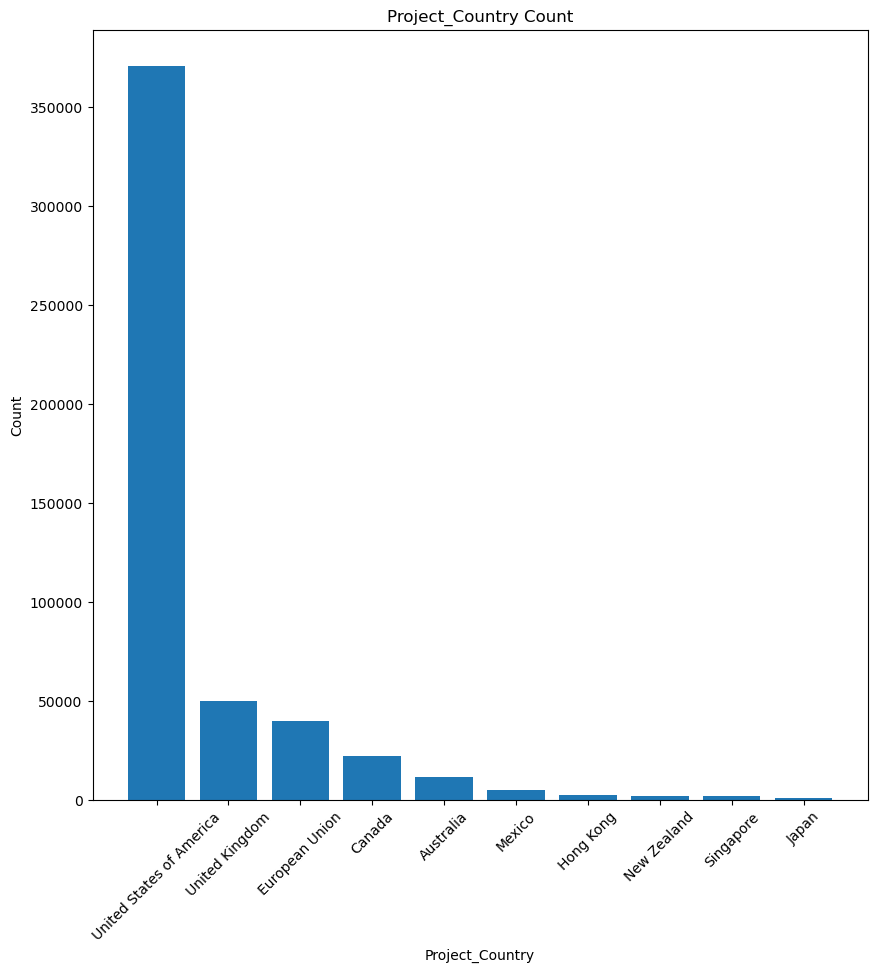

In [27]:
#regraph country counts
country_count = get_counts(data, 'Project_Country')
graph_counts(country_count, 'Project_Country', 'Count', (10, 10))

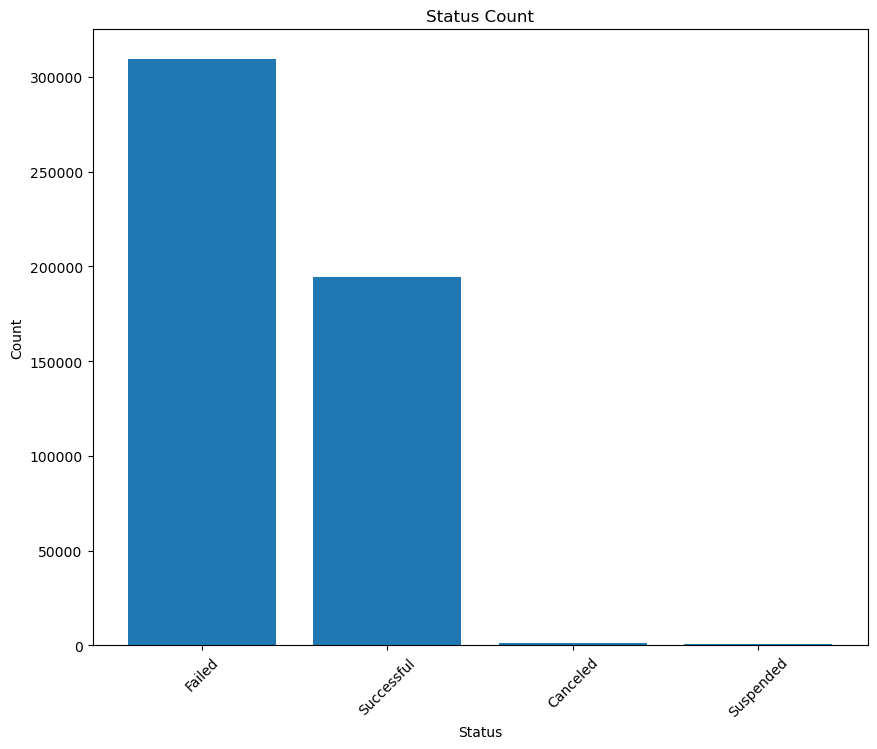

In [28]:
#graph campaign counts by Status
graph_counts(status_count, 'Status', 'Count', (10, 8))

There are more Failed campaigns than Successful ones. I do consider Canceled and Suspended as Failed and I will reflect that in the dataframe

Keep in mind for modelling as there is an imbalanced dataset

In [66]:
#Replace Canceled and Suspended with Failed
data['Status'].replace(['Canceled', 'Suspended'], 'Failed', inplace=True)

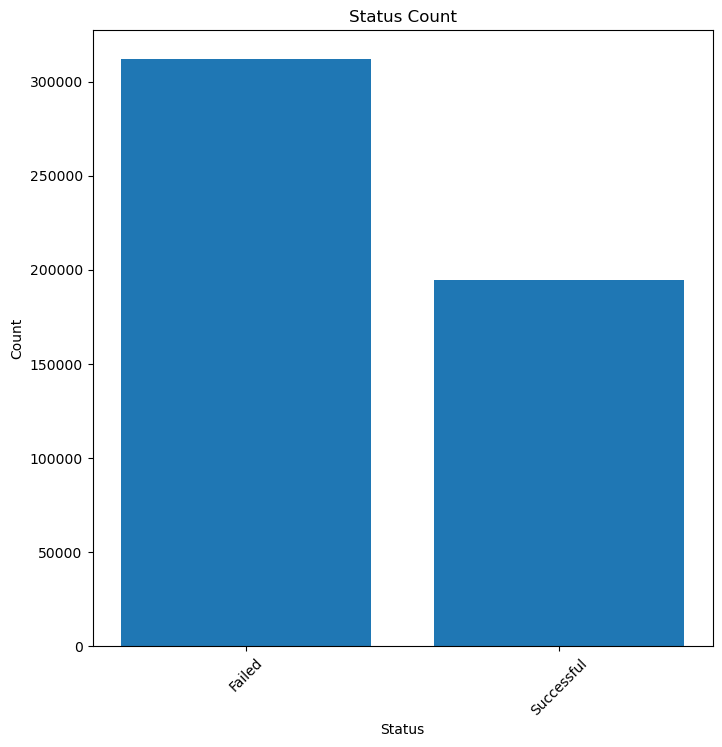

In [32]:
#remake counts and graphs for status

status_count = get_counts(data, 'Status')
graph_counts(status_count, 'Status', 'Count',(8,8))

Let's explore success rates by category and country

In [33]:
#success rates by category and country

#function to get success rate
def success_rate(dataframe):
    return (dataframe.eq('Successful').sum() / dataframe.size *100).round(0)

#plot success rate
def plot_success_rate(data, title, xlabel, ylabel, rot=int, figsize=tuple):
    data.plot.bar(rot=rot, figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

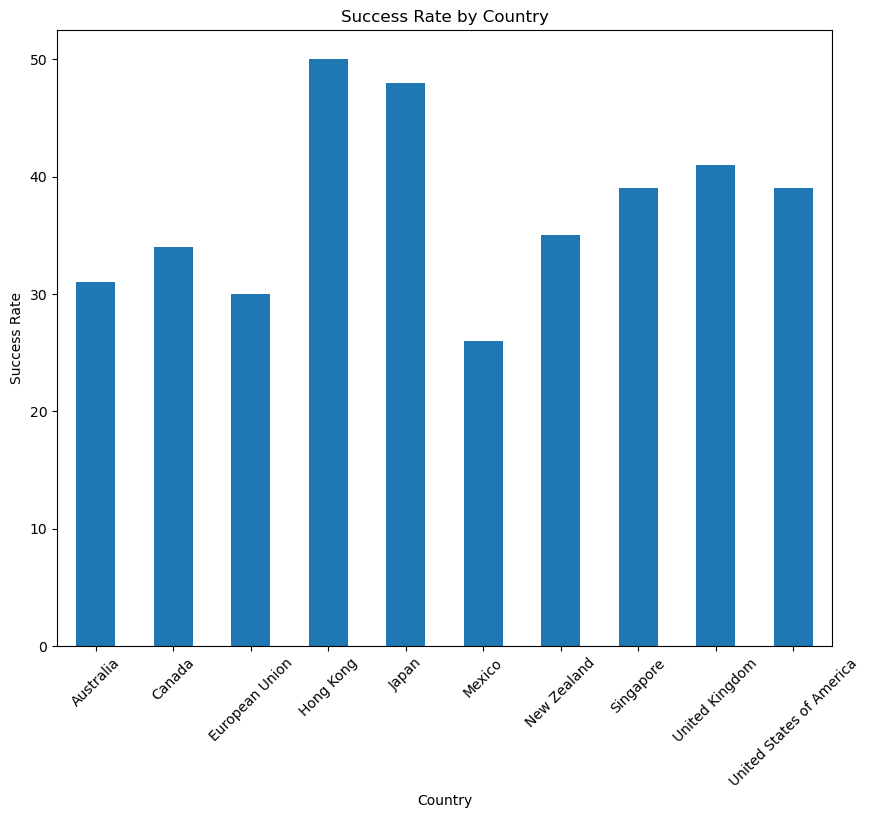

In [34]:
#success rate by country
country_success = data.groupby('Project_Country')['Status'].agg(success_rate)
#plot success rate
plot_success_rate(country_success, 'Success Rate by Country', 'Country', 'Success Rate', 45, (10, 8))


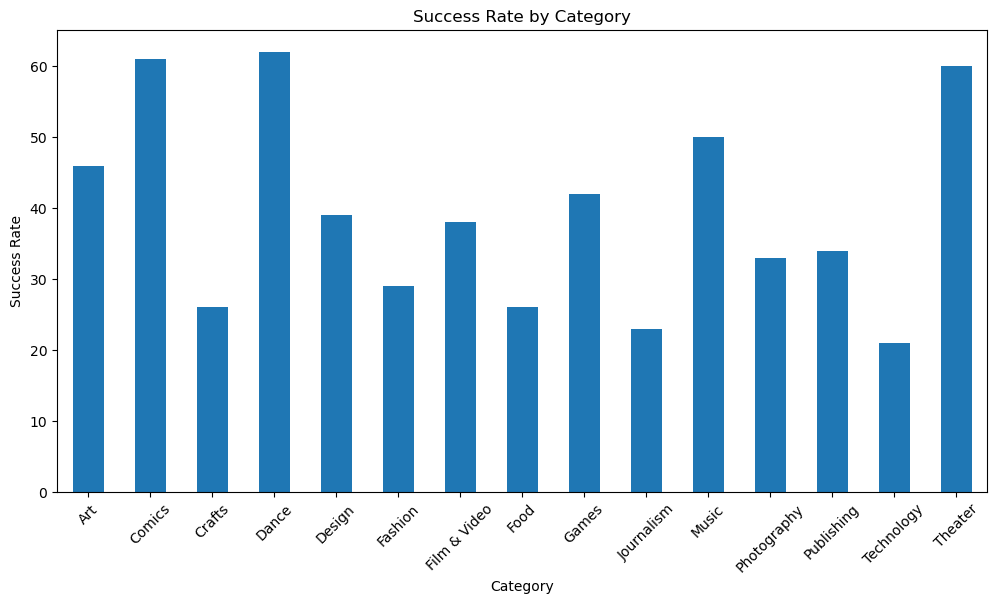

In [35]:
# success rate by category
category_success = data.groupby('Category')['Status'].agg(success_rate)
plot_success_rate(category_success, 'Success Rate by Category', 'Category', 'Success Rate', rot=45, figsize=(12, 6))

Do counts and success rate by country and category

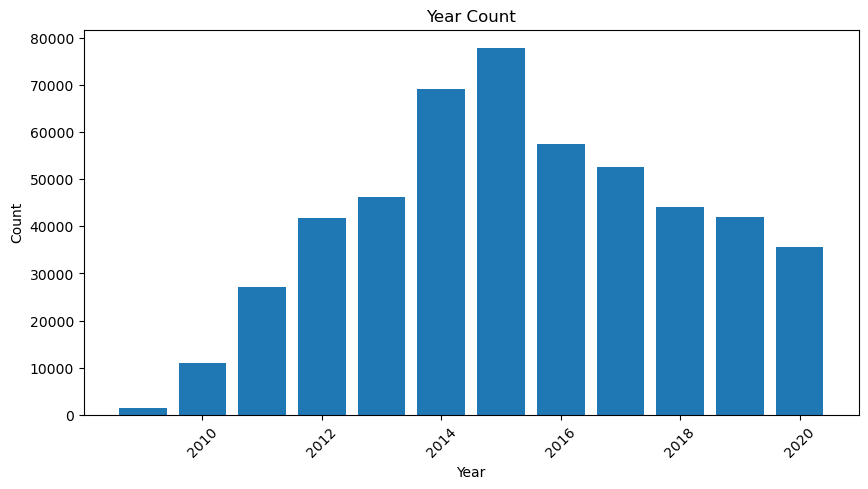

In [37]:
#get campaign counts per year, per month, success/fail rate for both too, top category per year and month

#campaign counts per year
counts_year = get_counts(data, 'Year')
graph_counts(counts_year, 'Year', 'Count', (10, 5))

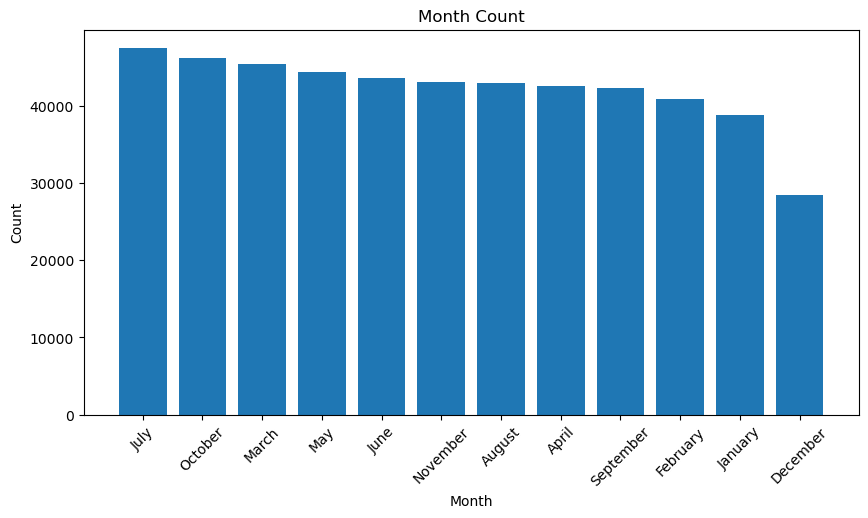

In [39]:
#campaign counts per month
count_month = get_counts(data, 'Month')
graph_counts(count_month, 'Month', 'Count', (10, 5))

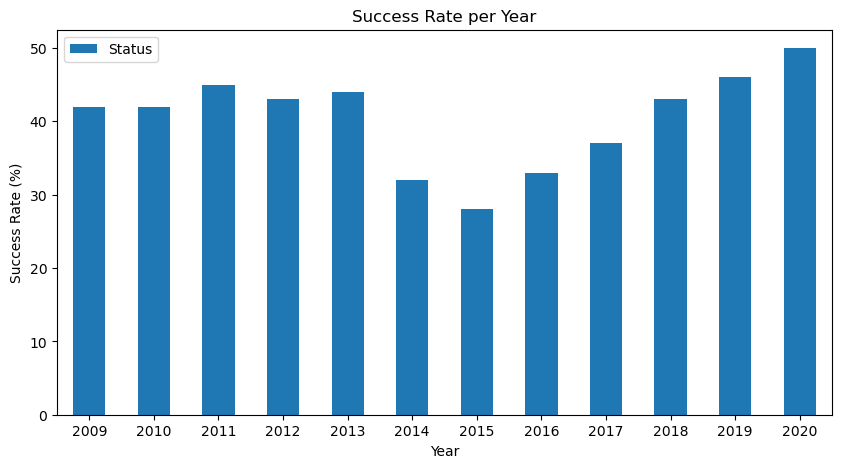

In [40]:
#new df for success rate by year
time_df = data[['Category' , 'Year', 'Month', 'Status']].copy()

#success rate for years
success_rate_years =  pd.DataFrame(time_df.groupby('Year')['Status'].agg(success_rate))

#plot success rate/ year
plot_success_rate(success_rate_years, 'Success Rate per Year', 'Year', 'Success Rate (%)', rot=0, figsize=(10, 5))



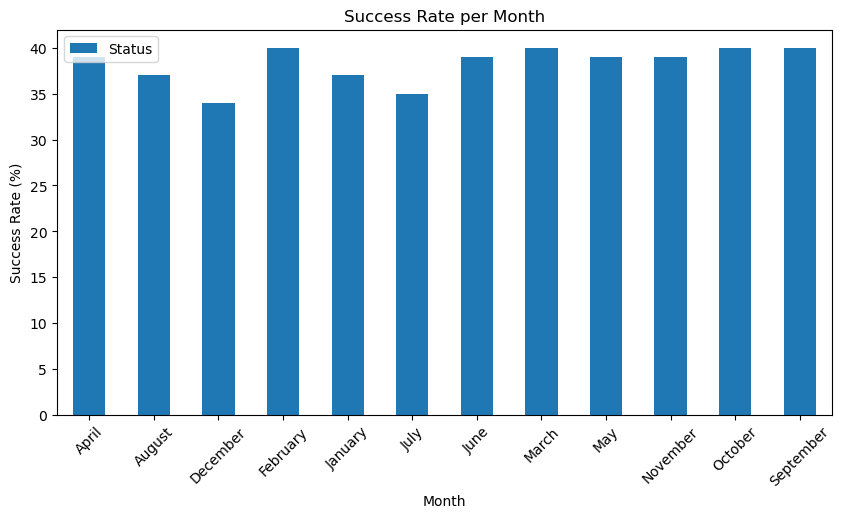

In [41]:
#success rate per month

success_rate_months = pd.DataFrame(time_df.groupby('Month')['Status'].agg(success_rate))
plot_success_rate(success_rate_months, 'Success Rate per Month', 'Month', 'Success Rate (%)', rot=45, figsize=(10, 5))

The data will be explored further in Tableau. It's just easier

# Data Distribution and Preprocessing

To do, one hot encode Category and Country, make Status 0 or 1 (F or S), remove Backers

Maybe reduce Category and Country to more high level categories

In [67]:
#I'm going to make a new df and drop some irrelevent columns like all the ID's

new_df = data.copy()

In [69]:
#drop ID columns - no longer necessary
new_df = new_df.drop(['Case_ID', 'Pid', 'Category_id', 'Subcategory_id', 'Uid'], axis=1)

In [72]:
#make dict to change Status values to numeric
status_dict = {'Successful': 1, 'Failed': 0}

new_df.loc[:, 'Status'].replace(status_dict, inplace=True)

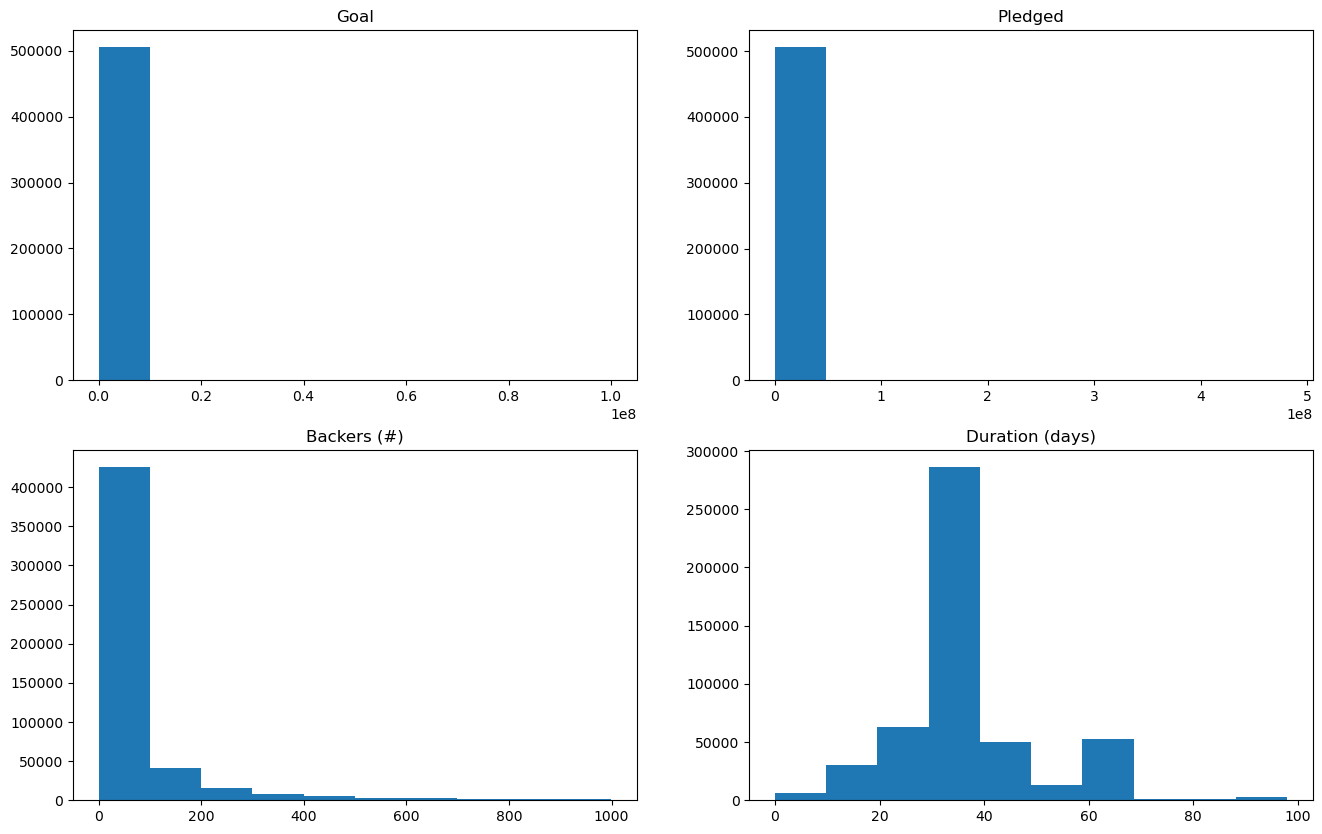

In [45]:
#make histograms and boxplots
make_hist(new_df, numeric_columns, 2, 2, (16, 10))

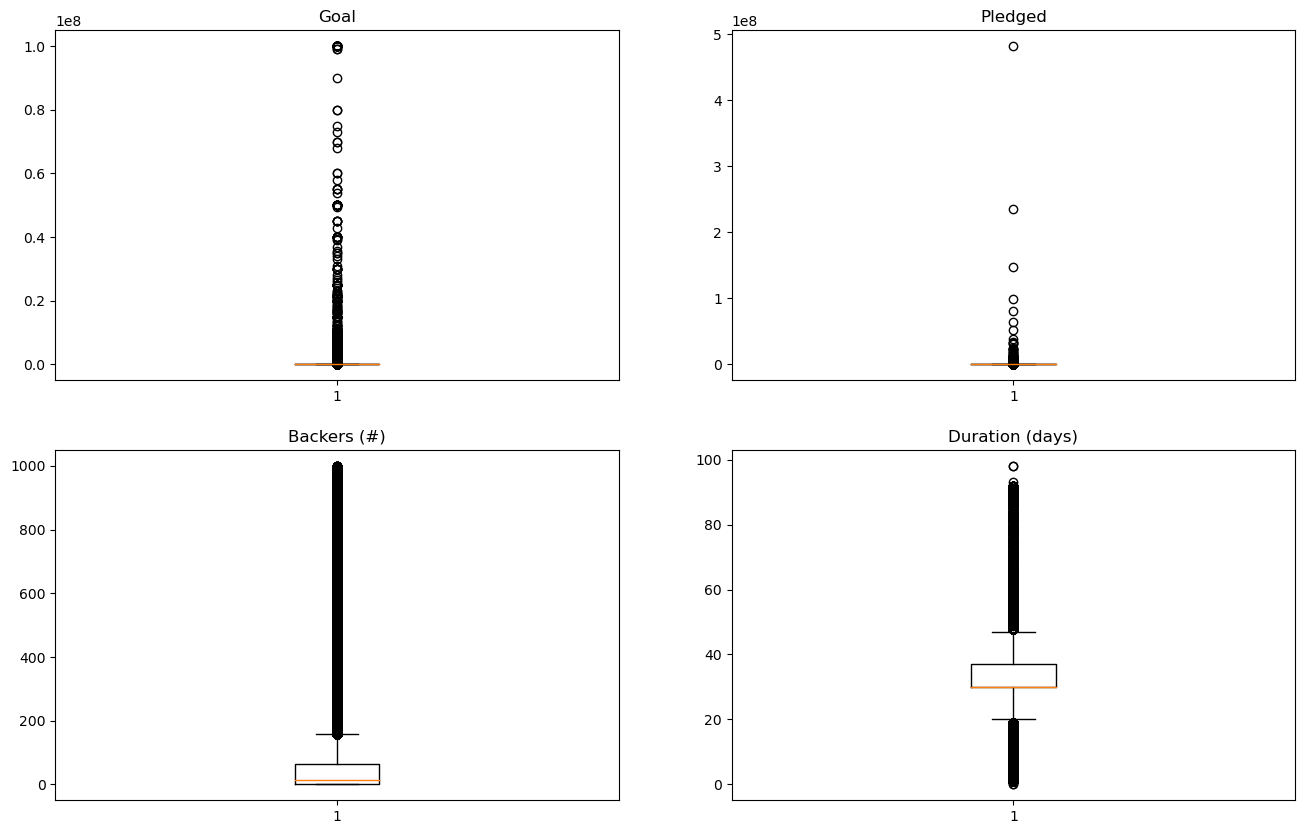

In [46]:
#make some boxplots
make_boxplot(new_df, numeric_columns, 2, 2, (16, 10))

Goal and Pledged have a single column in the histogram do to the range, will likely do a log transform.

Duration looks good for the most part, but may have to do a winsorization. Outliers will be kept as they appear to be important

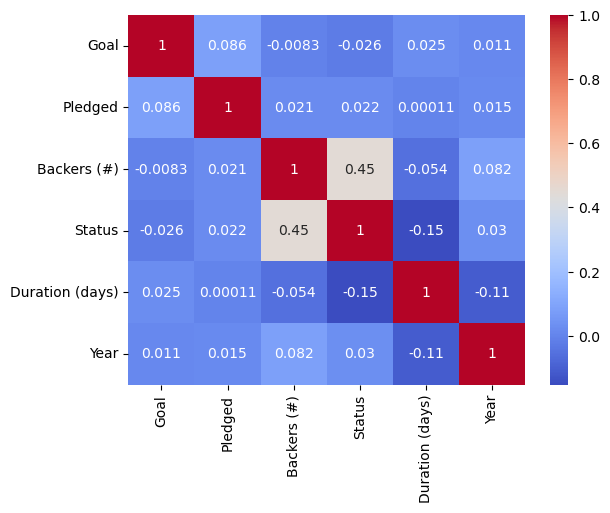

In [73]:
#make heatmap
make_heatmap(new_df)

Mild correlation between Backers and Status

In [74]:
# For Goal, Pledged, and Backers need to do add 1 to all data points then take np.log10

#function to add 1 and take np.log10
def log10p(data):
    data = data + 1
    y = np.log10(data)
    return y

In [75]:
#log transform data
new_df.loc[:, ['Goal', 'Pledged', 'Backers (#)']] = log10p(new_df[['Goal', 'Pledged', 'Backers (#)']])


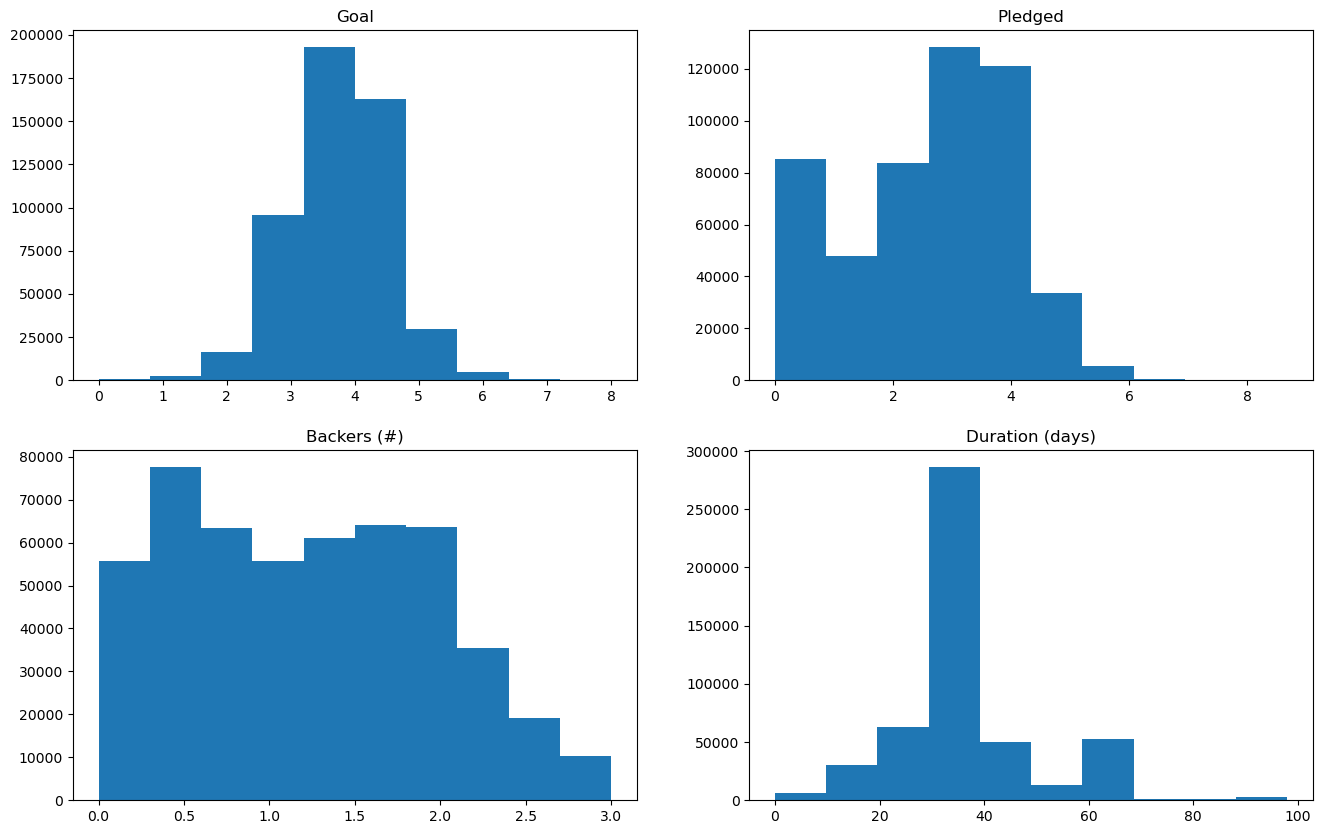

In [76]:
columns = ['Goal', 'Pledged', 'Backers (#)', 'Duration (days)']
make_hist(new_df, columns, 2, 2, (16, 10))

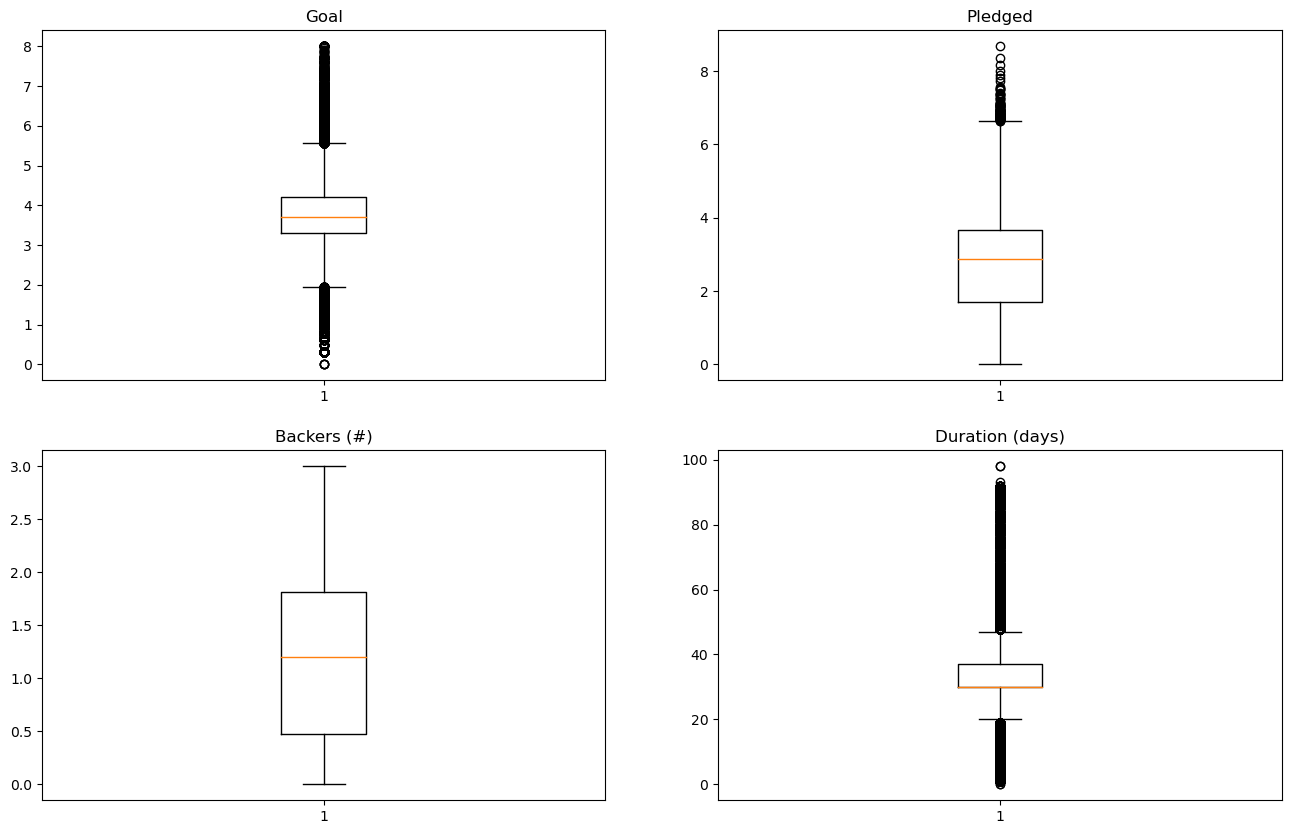

In [56]:
make_boxplot(new_df, columns, 2, 2, (16, 10))

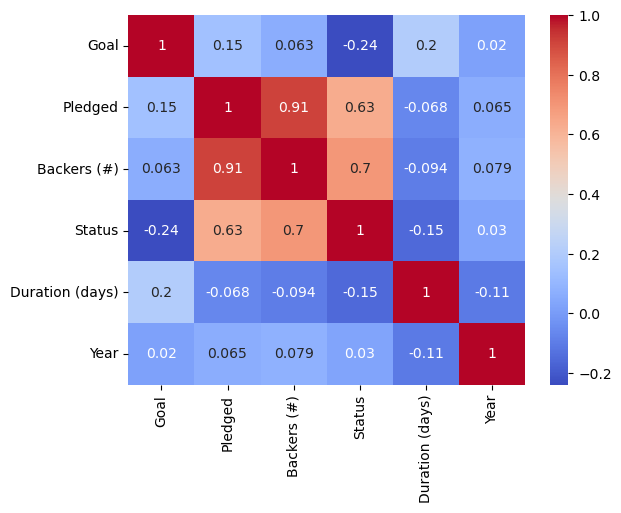

In [77]:
#make a heat map
make_heatmap(new_df)

- Data appears a bit more normalish now
- low inverse correlation amoing Status and Goal
- strongish correlation with Pledged and Backers (#) with Status
- Very strong correlation between Backers (#) and Pledged
- **Will drop Backers (#) because it has the higher correlation with my target and my definition of success is Pledged >= Goal, not necessarily the number of backers**

In [78]:
#drop Backers (#)
new_df.drop('Backers (#)', axis=1, inplace=True)

In [80]:
df_info(new_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Category          506199 non-null  object        
 1   Subcategory       506199 non-null  object        
 2   Project_Country   506199 non-null  object        
 3   Launched          506199 non-null  datetime64[ns]
 4   Deadline          506199 non-null  datetime64[ns]
 5   Project_Currency  506199 non-null  object        
 6   Goal              506199 non-null  float64       
 7   Pledged           506199 non-null  float64       
 8   Status            506199 non-null  int64         
 9   Duration (days)   506199 non-null  int64         
 10  Year              506199 non-null  int64         
 11  Month             506199 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 46.3+ MB


In [81]:
#will drop Launched and Deadline too, I extracted relevent info already
#drop project_currency too as the information is captured in Project_country
new_df.drop(['Launched', 'Deadline', 'Project_Currency'], axis=1, inplace=True)

In [84]:
#export new_df
new_df.to_csv('model_df.csv')


# Feature Selection